In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# VitalDB data from: https://vitaldb.net/dataset/?query=api

cases_df = pd.read_csv('data/cases.csv')
trks_df = pd.read_csv('data/trks.csv')
results_df = pd.read_csv('data/results.csv')

In [13]:
cases_df.head()

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100


In [14]:
cases_df.columns

Index(['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend',
       'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age',
       'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype',
       'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn',
       'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt',
       'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc',
       'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr',
       'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2',
       'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize',
       'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl',
       'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid',
       'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn',
       'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe',
       'intraop_epi', 'intraop_ca'],
     

In [23]:
cases_df['asa'].value_counts()

asa
2.0    3699
1.0    1792
3.0     703
4.0      48
6.0      13
Name: count, dtype: int64

In [24]:
cases_df['department'].value_counts()

department
General surgery     4930
Thoracic surgery    1111
Gynecology           230
Urology              117
Name: count, dtype: int64

/var/folders/39/pbkz55tn77x5j29wl0sjvkn40000gn/T/ipykernel_6893/2181442922.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["age_bin"] = pd.cut(df_clean["age"], bins=range(0, 90, 10), right=False)


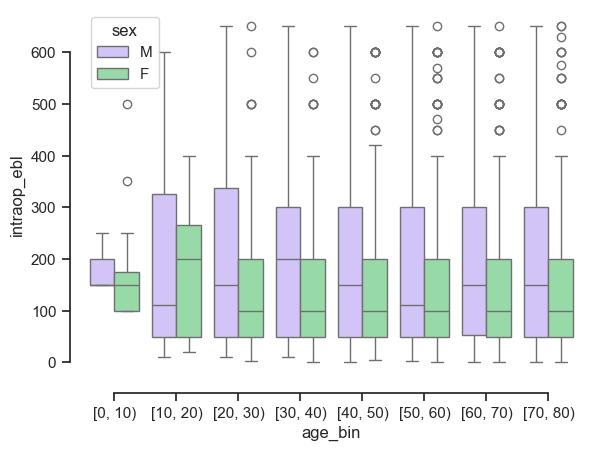

In [54]:
sns.set_theme(style="ticks", palette="pastel")

Q1 = cases_df["intraop_ebl"].quantile(0.25)
Q3 = cases_df["intraop_ebl"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_clean = cases_df[(cases_df["intraop_ebl"] >= lower_bound) & (cases_df["intraop_ebl"] <= upper_bound)]


df_clean["age_bin"] = pd.cut(df_clean["age"], bins=range(0, 90, 10), right=False)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="age_bin", y="intraop_ebl",
            hue="sex", palette=["m", "g"],
            data=df_clean)
sns.despine(offset=10, trim=True)

<Axes: xlabel='age', ylabel='intraop_ebl'>

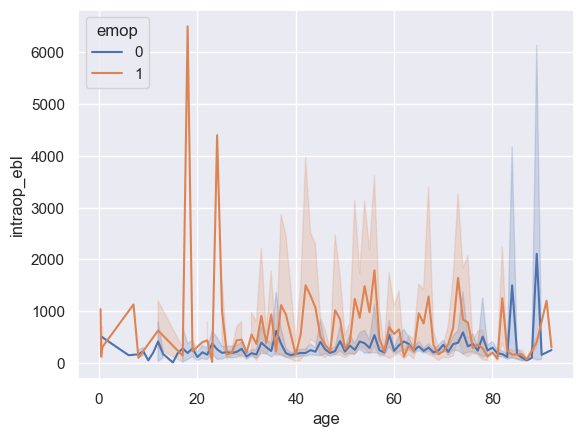

In [40]:
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="age", y="intraop_ebl",
             hue="emop",
             data=cases_df)

In [53]:
blood_val = cases_df["intraop_ebl"].value_counts().sort_index()
blood_val[blood_val.index > 4000]


intraop_ebl
4200.0     1
4400.0     1
4460.0     1
4500.0     1
4600.0     1
4700.0     2
4800.0     1
5050.0     1
5200.0     1
5500.0     3
5750.0     1
6000.0     1
6150.0     1
6500.0     2
6950.0     1
7000.0     1
7200.0     1
7500.0     1
7650.0     1
7950.0     1
8000.0     2
8150.0     1
8900.0     1
9000.0     1
9300.0     1
10000.0    1
10100.0    1
10300.0    1
10600.0    1
11100.0    1
11150.0    1
13850.0    1
14900.0    1
16900.0    1
21200.0    1
28500.0    1
30100.0    1
Name: count, dtype: int64